In [1]:
# Import the libraries.
import os
import tweepy as tw

import numpy as np
import snscrape.modules.twitter as sntwitter
import pandas as pd
import re
import string
import emoji
import gensim
from gensim import corpora
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re
import emoji
import string
from pymannkendall import original_test as mk_test



In [2]:
Suicidal_df = pd.read_csv('Suicidal_Twitter_Data.csv')

In [3]:
#The final dataset is;
Suicidal_df.head()

,Unnamed: 0.1,Unnamed: 0,Datetime,Text,retweets,likes
0,0,0,2021-07-23 13:30:40+00:00,#ThroughTheStorm2021 Depression is the flu in...,1,3
1,1,1,2021-07-20 15:52:16+00:00,The moment you lose someone really close to it...,4,8
2,2,2,2021-07-20 08:21:31+00:00,@SistersforaSis1 @BravinYuri Research has show...,2,1
3,3,3,2021-07-19 10:53:17+00:00,I love how people are riding on this #mentalhe...,4,24
4,4,4,2021-07-18 11:06:31+00:00,Nime realize kila mmoja wenu ako na depression...,0,1


In [4]:
#Drop unnecessary columns
Suicidal_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

,Datetime,Text,retweets,likes
0,2021-07-23 13:30:40+00:00,#ThroughTheStorm2021 Depression is the flu in...,1,3
1,2021-07-20 15:52:16+00:00,The moment you lose someone really close to it...,4,8
2,2021-07-20 08:21:31+00:00,@SistersforaSis1 @BravinYuri Research has show...,2,1
3,2021-07-19 10:53:17+00:00,I love how people are riding on this #mentalhe...,4,24
4,2021-07-18 11:06:31+00:00,Nime realize kila mmoja wenu ako na depression...,0,1
...,...,...,...,...
6256,2020-02-16 08:57:32+00:00,@ahmednassirow @FarahMaalimM Which casualties?...,0,0
6257,2020-02-16 03:51:41+00:00,@DanielN61841575 @dailynation No. Suicide can'...,0,1
6258,2020-02-15 21:09:01+00:00,😔😔😔...\nAnd same people busy posting RIP after...,0,0
6259,2020-02-15 19:25:52+00:00,The only positive thing from this belligerent ...,0,0


In [5]:
def clean_tweet(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    
    # Remove single letters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    # Remove reserved words
    text = re.sub(r'^RT[\s]+', '', text)
    
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove emojis
    text = emoji.demojize(text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    return text

# Apply the function to the 'text' column and create a new column 'clean_text'
Suicidal_df['clean_text'] = Suicidal_df['Text'].apply(clean_tweet)

In [6]:
Suicidal_df.head(5)

,Unnamed: 0.1,Unnamed: 0,Datetime,Text,retweets,likes,clean_text
0,0,0,2021-07-23 13:30:40+00:00,#ThroughTheStorm2021 Depression is the flu in...,1,3,Depression is the flu in mental illness
1,1,1,2021-07-20 15:52:16+00:00,The moment you lose someone really close to it...,4,8,The moment you lose someone really close to it...
2,2,2,2021-07-20 08:21:31+00:00,@SistersforaSis1 @BravinYuri Research has show...,2,1,Research has shown that too much of social med...
3,3,3,2021-07-19 10:53:17+00:00,I love how people are riding on this #mentalhe...,4,24,I love how people are riding on this fiasco in...
4,4,4,2021-07-18 11:06:31+00:00,Nime realize kila mmoja wenu ako na depression...,0,1,Nime realize kila mmoja wenu ako na depression...


In [7]:
#Drop Unnecessary Columns
Suicidal_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

,Datetime,Text,retweets,likes,clean_text
0,2021-07-23 13:30:40+00:00,#ThroughTheStorm2021 Depression is the flu in...,1,3,Depression is the flu in mental illness
1,2021-07-20 15:52:16+00:00,The moment you lose someone really close to it...,4,8,The moment you lose someone really close to it...
2,2021-07-20 08:21:31+00:00,@SistersforaSis1 @BravinYuri Research has show...,2,1,Research has shown that too much of social med...
3,2021-07-19 10:53:17+00:00,I love how people are riding on this #mentalhe...,4,24,I love how people are riding on this fiasco in...
4,2021-07-18 11:06:31+00:00,Nime realize kila mmoja wenu ako na depression...,0,1,Nime realize kila mmoja wenu ako na depression...
...,...,...,...,...,...
6256,2020-02-16 08:57:32+00:00,@ahmednassirow @FarahMaalimM Which casualties?...,0,0,Which casualties In the recent past Al Shabab ...
6257,2020-02-16 03:51:41+00:00,@DanielN61841575 @dailynation No. Suicide can'...,0,1,No Suicide cant be an option Cant even be disc...
6258,2020-02-15 21:09:01+00:00,😔😔😔...\nAnd same people busy posting RIP after...,0,0,pensivefacepensivefacepensiveface And same peo...
6259,2020-02-15 19:25:52+00:00,The only positive thing from this belligerent ...,0,0,The only positive thing from this belligerent ...


## Objective 2: Weekly Patterns of Suicidal Trends

C:\Users\apugo\AppData\Local\Temp\ipykernel_33072\2058229369.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  Suicidal_df['Week'] = Suicidal_df['Datetime'].dt.to_period('W').dt.to_timestamp()


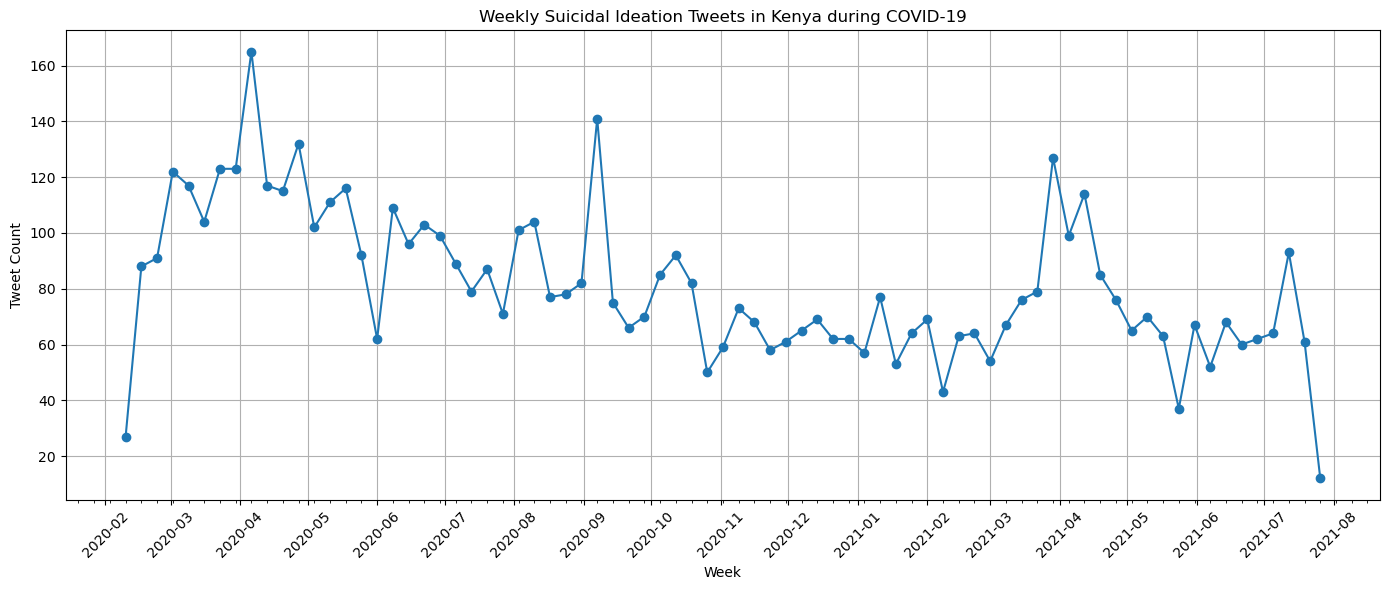

In [8]:

# Convert to datetime
Suicidal_df['Datetime'] = pd.to_datetime(Suicidal_df['Datetime'])

# Filter required columns
Suicidal_df = Suicidal_df[['Datetime', 'clean_text']]

# Group by week and count tweets
Suicidal_df['Week'] = Suicidal_df['Datetime'].dt.to_period('W').dt.to_timestamp()
weekly_counts = Suicidal_df.groupby('Week').size()

# Plot weekly trends
plt.figure(figsize=(14, 6))
plt.plot(weekly_counts.index, weekly_counts.values, marker='o', linestyle='-')
plt.title('Weekly Suicidal Ideation Tweets in Kenya during COVID-19')
plt.xlabel('Week')
plt.ylabel('Tweet Count')

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Monthly major ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.MO))  # Minor weekly ticks

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Mann-Kendall Trend to detect monotonic trends

In [9]:

# Mann-Kendall trend test on weekly tweet counts
result = mk_test(weekly_counts.values)

# Print the result
print("Mann-Kendall Trend Test Result:")
print(result)


Mann-Kendall Trend Test Result:
Mann_Kendall_Test(trend='decreasing', h=True, p=1.655372994235904e-08, z=-5.644629544932864, Tau=-0.4388243335611757, s=-1284.0, var_s=51663.333333333336, slope=-0.75, intercept=104.5)


In [10]:

def clean_tweet(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    
    # Remove single letters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    # Remove reserved words
    text = re.sub(r'^RT[\s]+', '', text)
    
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove emojis
    text = emoji.demojize(text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    return text





In [11]:
#separate the column
tweets = Suicidal_df['clean_text']

tweets

0                 Depression is the flu in mental illness
1       The moment you lose someone really close to it...
2       Research has shown that too much of social med...
3       I love how people are riding on this fiasco in...
4       Nime realize kila mmoja wenu ako na depression...
                              ...                        
6256    Which casualties In the recent past Al Shabab ...
6257    No Suicide cant be an option Cant even be disc...
6258    pensivefacepensivefacepensiveface And same peo...
6259    The only positive thing from this belligerent ...
6260    We should all do it but we may as well commit ...
Name: clean_text, Length: 6261, dtype: object

In [12]:
import pandas as pd
import re
from gensim import corpora
import gensim

# Mental health-related keywords
mental_health_keywords = set([
    'depressed', 'suicide', 'hopeless', 'worthless', 'alone',
    'anxious', 'kill', 'selfharm', 'sad', 'tired', 'pain', 'useless',
    'die', 'dying', 'crying', 'breakdown', 'fear', 'mentalhealth',
    'overwhelmed', 'panic', 'cutting', 'hate myself', 'end it all'
])

# Clean tweets function
def clean_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet)
    tweet = re.sub(r'\@\w+|\#','', tweet)
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)
    tweet = tweet.lower().strip()
    return tweet

# Load tweets from the DataFrame
tweets = Suicidal_df['clean_text'].tolist()
processed_tweets = [clean_tweet(tweet) for tweet in tweets]

# --- Topic Modeling with Gensim LDA ---
tokenized_tweets = [tweet.split() for tweet in processed_tweets]
dictionary = corpora.Dictionary(tokenized_tweets)
corpus = [dictionary.doc2bow(tweet) for tweet in tokenized_tweets]

# Train LDA model
num_topics = 10
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

print("\n--- Topics Discovered ---")
for topic in lda_model.show_topics(num_topics=num_topics):
    print(topic)

# --- Sentiment Labeling using Lexicon ---
sentiments = []
for tweet in processed_tweets:
    if any(keyword in tweet for keyword in mental_health_keywords):
        sentiments.append("Negative")  # Possibly suicidal or distressed
    else:
        sentiments.append("Positive")  # No apparent distress indicators

# --- Final Output DataFrame ---
df_polarity = pd.DataFrame({
    'clean_text': tweets,
    'Sentiment': sentiments
})

# Add numeric label
df_polarity['label'] = df_polarity['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# Save to CSV
df_polarity.to_csv('df_polarity.csv', index=False)

# Display top rows
print("\n--- Sample Output ---")
print(df_polarity.head(10))



--- Topics Discovered ---
(0, '0.019*"suicide" + 0.013*"of" + 0.011*"to" + 0.010*"discussion" + 0.009*"prevention" + 0.008*"the" + 0.008*"office" + 0.008*"is" + 0.008*"reduce" + 0.007*"hakuna"')
(1, '0.037*"the" + 0.036*"suicide" + 0.031*"to" + 0.025*"in" + 0.018*"and" + 0.013*"my" + 0.012*"be" + 0.012*"of" + 0.012*"you" + 0.011*"was"')
(2, '0.023*"the" + 0.023*"to" + 0.014*"are" + 0.011*"of" + 0.011*"suicide" + 0.010*"their" + 0.009*"and" + 0.009*"struggle" + 0.009*"they" + 0.008*"rollingonthefloorlaughing"')
(3, '0.054*"suicide" + 0.022*"to" + 0.019*"committing" + 0.016*"his" + 0.013*"committed" + 0.013*"and" + 0.013*"of" + 0.013*"the" + 0.012*"for" + 0.012*"he"')
(4, '0.049*"the" + 0.036*"to" + 0.032*"is" + 0.029*"suicide" + 0.029*"of" + 0.022*"and" + 0.020*"in" + 0.016*"are" + 0.013*"that" + 0.012*"you"')
(5, '0.034*"suicide" + 0.033*"to" + 0.026*"the" + 0.022*"and" + 0.018*"is" + 0.017*"we" + 0.013*"you" + 0.012*"of" + 0.012*"in" + 0.010*"suffering"')
(6, '0.069*"suffering" + 0.0

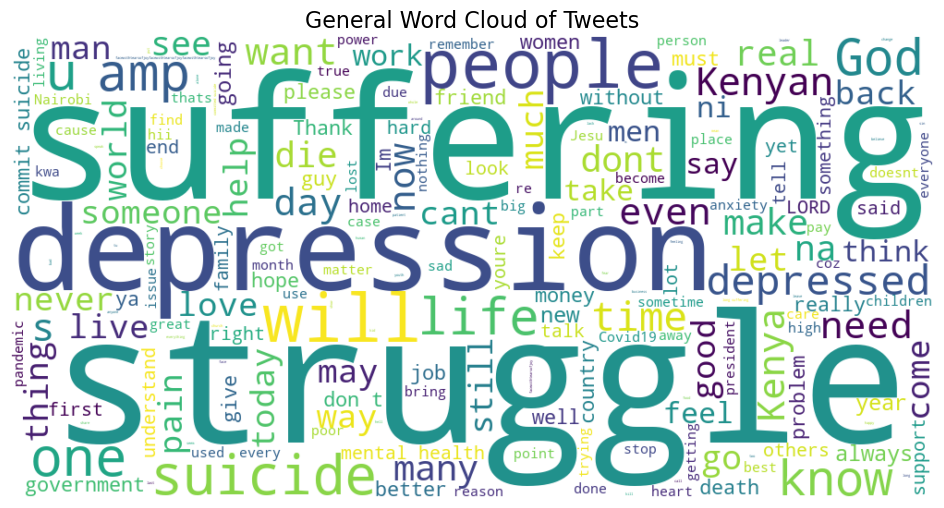

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine stopwords
stopwords = set(STOPWORDS)

# Combine all clean text (positive + negative together)
all_text = " ".join(df_polarity['clean_text'].astype(str))

# Generate general word cloud
wordcloud_all = WordCloud(
    stopwords=stopwords,
    background_color="white",
    colormap="viridis",   
    width=1000,
    height=500
).generate(all_text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis("off")
plt.title("General Word Cloud of Tweets", fontsize=16)
plt.show()


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load the labeled dataset
df = pd.read_csv("df_polarity.csv")

df['clean_text'] = df['clean_text'].astype(str).fillna('')

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])
sequences = tokenizer.texts_to_sequences(df['clean_text'])
padded = pad_sequences(sequences, maxlen=100)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    padded, df['label'], test_size=0.2, stratify=df['label'], random_state=42)

# LSTM Model
lstm_model = Sequential([
    Embedding(10000, 128, input_length=100),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0003),
              metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=15, batch_size=16,
                    validation_split=0.2, callbacks=[early_stop], verbose=1)

# Evaluate
y_pred_prob = lstm_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Results
print("LSTM Accuracy:", accuracy_score(y_test, y_pred))
print("LSTM F1 Score:", f1_score(y_test, y_pred))
print("LSTM AUC-ROC:", roc_auc_score(y_test, y_pred_prob))


C:\Users\apugo\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.6665 - loss: 0.6323 - val_accuracy: 0.8523 - val_loss: 0.4095
Epoch 2/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.8960 - loss: 0.2917 - val_accuracy: 0.8982 - val_loss: 0.2922
Epoch 3/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.9625 - loss: 0.1164 - val_accuracy: 0.9112 - val_loss: 0.3062
Epoch 4/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.9868 - loss: 0.0520 - val_accuracy: 0.9192 - val_loss: 0.3698
Epoch 5/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.9911 - loss: 0.0387 - val_accuracy: 0.8862 - val_loss: 0.4108
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step
LSTM Accuracy: 0.9058260175578612
LSTM F1 Score: 0.9350220264317181
LSTM AUC-ROC: 0.9370918382505868


In [15]:
#Logistic Regression, Naive Bayes and Random Forest
##trying cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Data
X = df['clean_text']
y = df['label']

# TF-IDF vectorizer (fit once)
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_tfidf = vectorizer.fit_transform(X)

# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42)
}

# Prepare 5-fold CV
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = {name: {"acc": [], "f1": [], "auc": []} for name in models}

# Perform CV for all models on the same folds
for train_index, test_index in kf.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        probs = model.predict_proba(X_test)[:, 1]

        results[name]["acc"].append(accuracy_score(y_test, preds))
        results[name]["f1"].append(f1_score(y_test, preds))
        results[name]["auc"].append(roc_auc_score(y_test, probs))

# Print final results
for name in models:
    print(f"\n=== {name} (5-Fold Cross-Validation) ===")
    print(f"Mean Accuracy: {np.mean(results[name]['acc']):.3f} ± {np.std(results[name]['acc']):.3f}")
    print(f"Mean F1-Score: {np.mean(results[name]['f1']):.3f} ± {np.std(results[name]['f1']):.3f}")
    print(f"Mean AUC-ROC: {np.mean(results[name]['auc']):.3f} ± {np.std(results[name]['auc']):.3f}")



=== Logistic Regression (5-Fold Cross-Validation) ===
Mean Accuracy: 0.886 ± 0.009
Mean F1-Score: 0.923 ± 0.006
Mean AUC-ROC: 0.944 ± 0.006

=== Naive Bayes (5-Fold Cross-Validation) ===
Mean Accuracy: 0.828 ± 0.010
Mean F1-Score: 0.888 ± 0.006
Mean AUC-ROC: 0.911 ± 0.008

=== Random Forest (5-Fold Cross-Validation) ===
Mean Accuracy: 0.839 ± 0.014
Mean F1-Score: 0.895 ± 0.008
Mean AUC-ROC: 0.956 ± 0.006


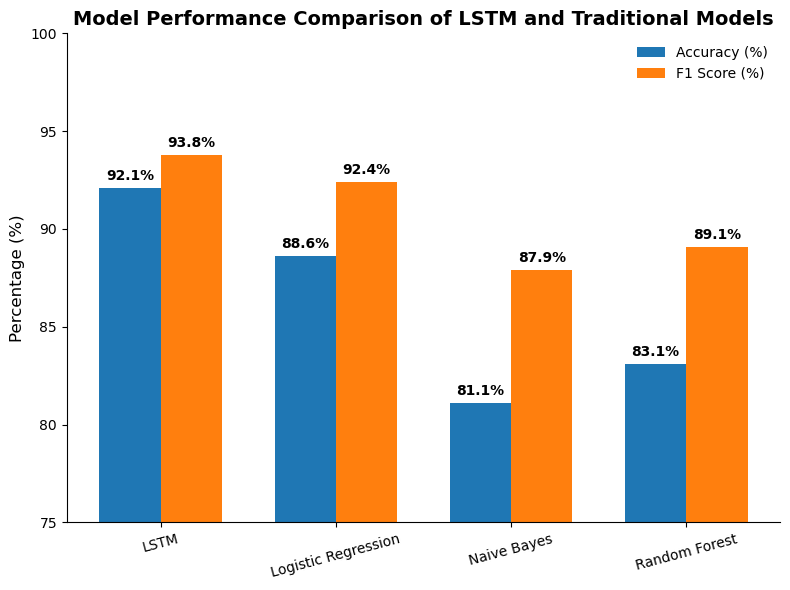

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# === Model names ===
models = ['LSTM', 'Logistic Regression', 'Naive Bayes', 'Random Forest']

accuracy = np.array([0.921, 0.886, 0.811, 0.831]) * 100
f1_score = np.array([0.938, 0.924, 0.879, 0.891]) * 100

x = np.arange(len(models))
width = 0.35

# === Create figure ===
plt.figure(figsize=(8,6))
bars1 = plt.bar(x - width/2, accuracy, width, label='Accuracy (%)', color='#1f77b4')
bars2 = plt.bar(x + width/2, f1_score, width, label='F1 Score (%)', color='#ff7f0e')

# === Add percentage labels ===
for bars in [bars1, bars2]:
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.4,
                 f'{bar.get_height():.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Model Performance Comparison of LSTM and Traditional Models', fontsize=14, fontweight='bold')
plt.xticks(x, models, rotation=15, fontsize=10)
plt.ylim(75, 100)
plt.legend(frameon=False, fontsize=10)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("df_polarity.csv")
df['clean_text'] = df['clean_text'].astype(str).fillna('')

# ONE SPLIT FOR ALL MODELS
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['clean_text'],
    df['label'],
    test_size=0.2,
    stratify=df['label'],
    random_state=42
)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# --- Logistic Regression ---
log_model = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=10000)),
    ("clf", LogisticRegression(max_iter=1000))
])
log_model.fit(X_train_text, y_train)
log_probs = log_model.predict_proba(X_test_text)[:, 1]
log_preds = log_model.predict(X_test_text)

# --- Naive Bayes ---
nb_model = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=10000)),
    ("clf", MultinomialNB())
])
nb_model.fit(X_train_text, y_train)
nb_probs = nb_model.predict_proba(X_test_text)[:, 1]
nb_preds = nb_model.predict(X_test_text)

# --- Random Forest ---
rf_model = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=10000, ngram_range=(1,2))),
    ("clf", RandomForestClassifier(
        n_estimators=200, max_depth=30, n_jobs=-1, random_state=42
    ))
])
rf_model.fit(X_train_text, y_train)
rf_probs = rf_model.predict_proba(X_test_text)[:, 1]
rf_preds = rf_model.predict(X_test_text)


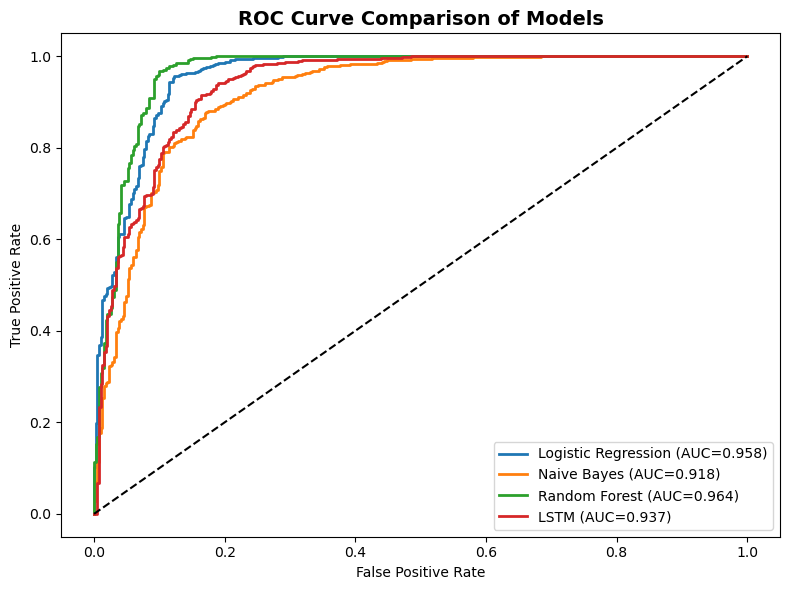

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ROC values
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, lw=2, label=f"Logistic Regression (AUC={auc(fpr_log,tpr_log):.3f})")
plt.plot(fpr_nb, tpr_nb, lw=2, label=f"Naive Bayes (AUC={auc(fpr_nb,tpr_nb):.3f})")
plt.plot(fpr_rf, tpr_rf, lw=2, label=f"Random Forest (AUC={auc(fpr_rf,tpr_rf):.3f})")
plt.plot(fpr_lstm, tpr_lstm, lw=2, label=f"LSTM (AUC={auc(fpr_lstm,tpr_lstm):.3f})")

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve Comparison of Models", fontsize=14, fontweight="bold")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()


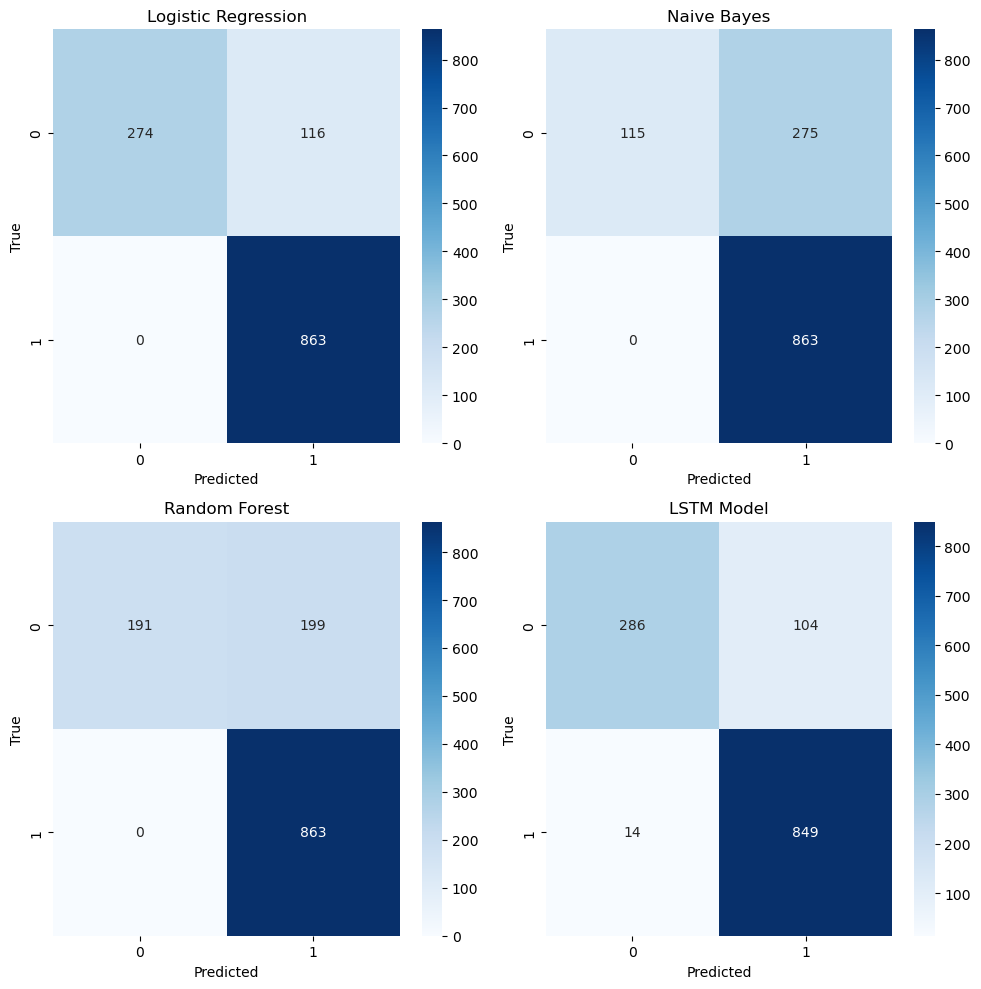

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cms = [
    ("Logistic Regression", confusion_matrix(y_test, log_preds)),
    ("Naive Bayes", confusion_matrix(y_test, nb_preds)),
    ("Random Forest", confusion_matrix(y_test, rf_preds)),
    ("LSTM Model", confusion_matrix(y_test, y_pred))
]

plt.figure(figsize=(10,10))
for i, (title, cm) in enumerate(cms, 1):
    plt.subplot(2,2,i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")

plt.tight_layout()
plt.show()


In [21]:
from statsmodels.stats.contingency_tables import mcnemar
import numpy as np
from itertools import combinations

# --- Define model predictions ---
preds = {
    "LSTM": y_pred,                     
    "Logistic Regression": log_preds,   
    "Naive Bayes": nb_preds,            
    "Random Forest": rf_preds           
}

# --- Pairwise McNemar comparisons ---
print("=== Pairwise McNemar’s Test Results ===\n")
for (m1, p1), (m2, p2) in combinations(preds.items(), 2):
    # Correct/incorrect classifications
    c1 = (p1 == y_test)
    c2 = (p2 == y_test)
    
    # Cells in the contingency table
    b = np.sum(c1 & ~c2)  # m1 correct, m2 wrong
    c = np.sum(~c1 & c2)  # m1 wrong, m2 correct
    
    # Build 2x2 table and run McNemar’s test (exact=True for small samples)
    table = [[0, b],
             [c, 0]]
    result = mcnemar(table, exact=True)
    
    # --- Output ---
    print(f"{m1} vs {m2}: b={b}, c={c}, p={result.pvalue:.5f}  "
          f"{'→ Significant' if result.pvalue < 0.05 else '→ Not significant'}")


=== Pairwise McNemar’s Test Results ===

LSTM vs Logistic Regression: b=22, c=24, p=0.88300  → Not significant
LSTM vs Naive Bayes: b=175, c=18, p=0.00000  → Significant
LSTM vs Random Forest: b=98, c=17, p=0.00000  → Significant
Logistic Regression vs Naive Bayes: b=161, c=2, p=0.00000  → Significant
Logistic Regression vs Random Forest: b=85, c=2, p=0.00000  → Significant
Naive Bayes vs Random Forest: b=27, c=103, p=0.00000  → Significant


In [22]:
# Save the trained LSTM model
lstm_model.save("lstm_model.h5")


In [23]:
import pickle

# Save tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
